In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train with class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       270
           1       0.80      0.40      0.53        30

    accuracy                           0.93       300
   macro avg       0.87      0.69      0.75       300
weighted avg       0.92      0.93      0.92       300



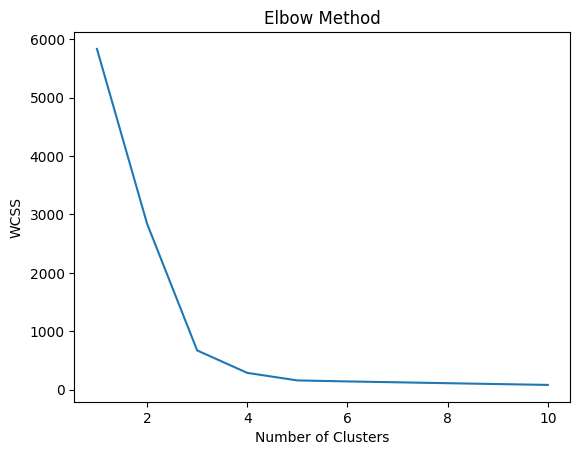

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a sample dataset
X, _ = make_blobs(n_samples=100, centers=5, random_state=42)

# Calculate WCSS (Inertia) for different values of k
wcss = []
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example dataset (replace with your own data)
X = np.random.rand(100, 50)  # 100 samples, 50 features

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (100, 50)
Reduced shape: (100, 2)


Sample Dataset:
   Age  Salary  Experience      Score  Bonus
0   58  119135          16  42.818415   7849
1   48   65222          33  96.665482  16443
2   34  107373           9  96.361998  12390
3   27  109575           6  85.300946  11905
4   40  114651          16  29.444889  16922

Correlation Matrix:
                 Age    Salary  Experience     Score     Bonus
Age         1.000000  0.030808   -0.033272  0.140941  0.079363
Salary      0.030808  1.000000   -0.086757 -0.019585  0.022026
Experience -0.033272 -0.086757    1.000000 -0.239905 -0.082012
Score       0.140941 -0.019585   -0.239905  1.000000 -0.192767
Bonus       0.079363  0.022026   -0.082012 -0.192767  1.000000


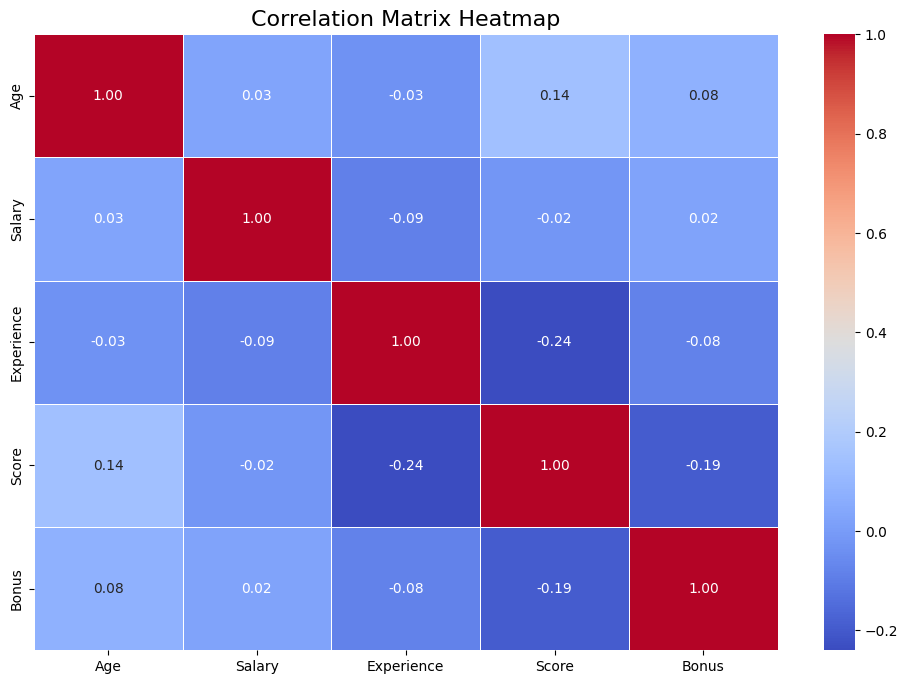


Strong Correlations (greater than 0.7 or less than -0.7):
            Age  Salary  Experience  Score  Bonus
Age         1.0     NaN         NaN    NaN    NaN
Salary      NaN     1.0         NaN    NaN    NaN
Experience  NaN     NaN         1.0    NaN    NaN
Score       NaN     NaN         NaN    1.0    NaN
Bonus       NaN     NaN         NaN    NaN    1.0


<Figure size 1000x1000 with 0 Axes>

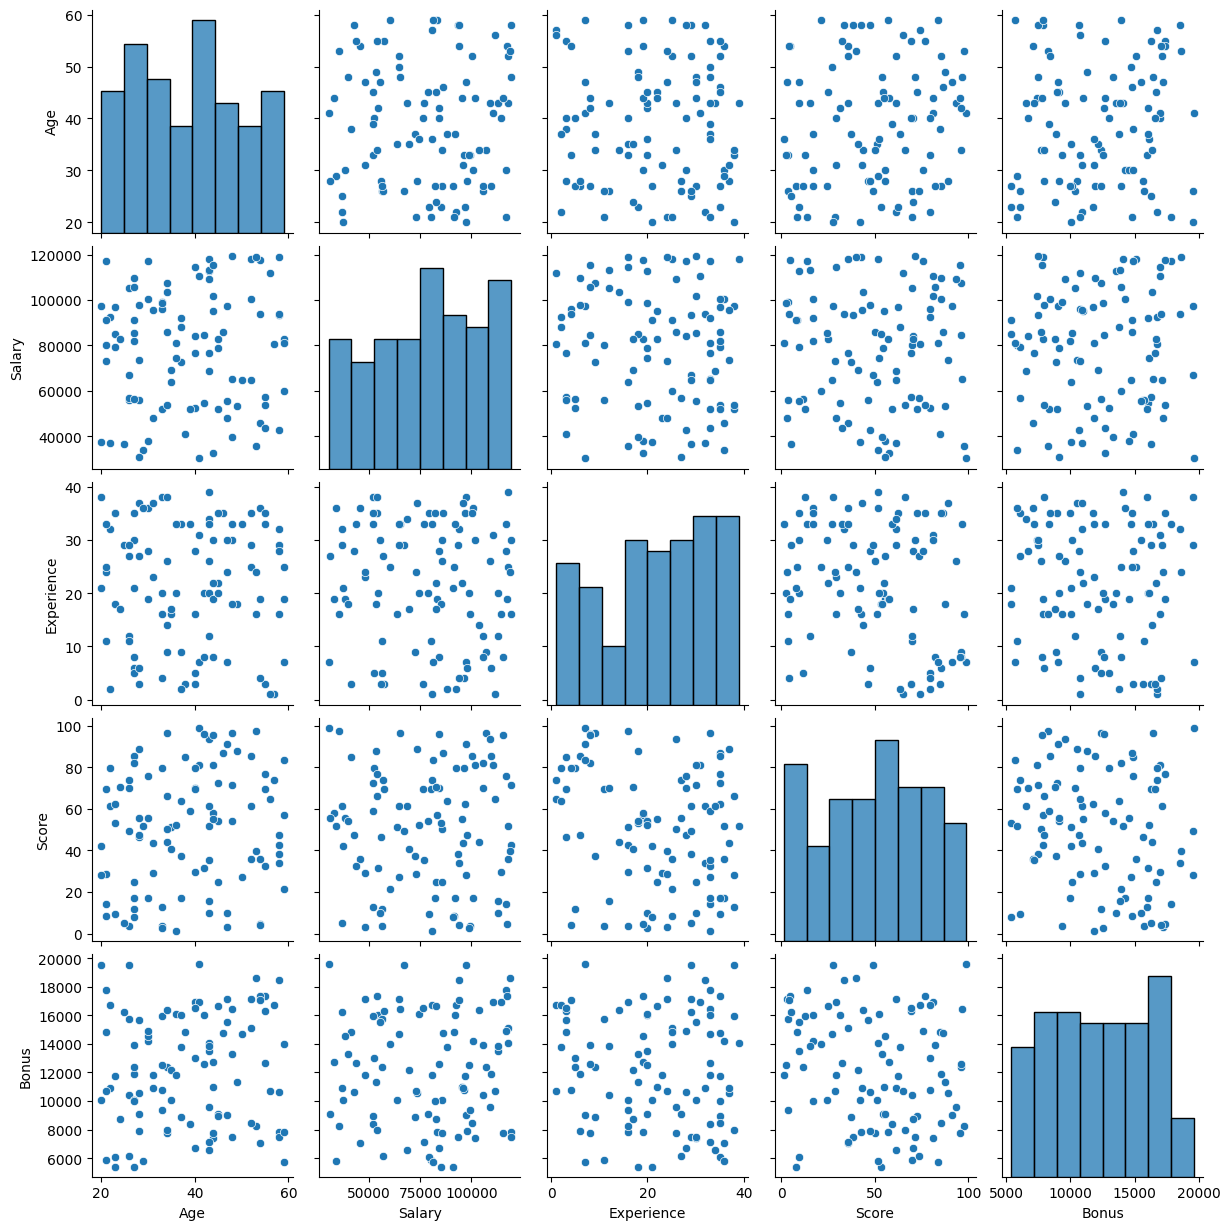

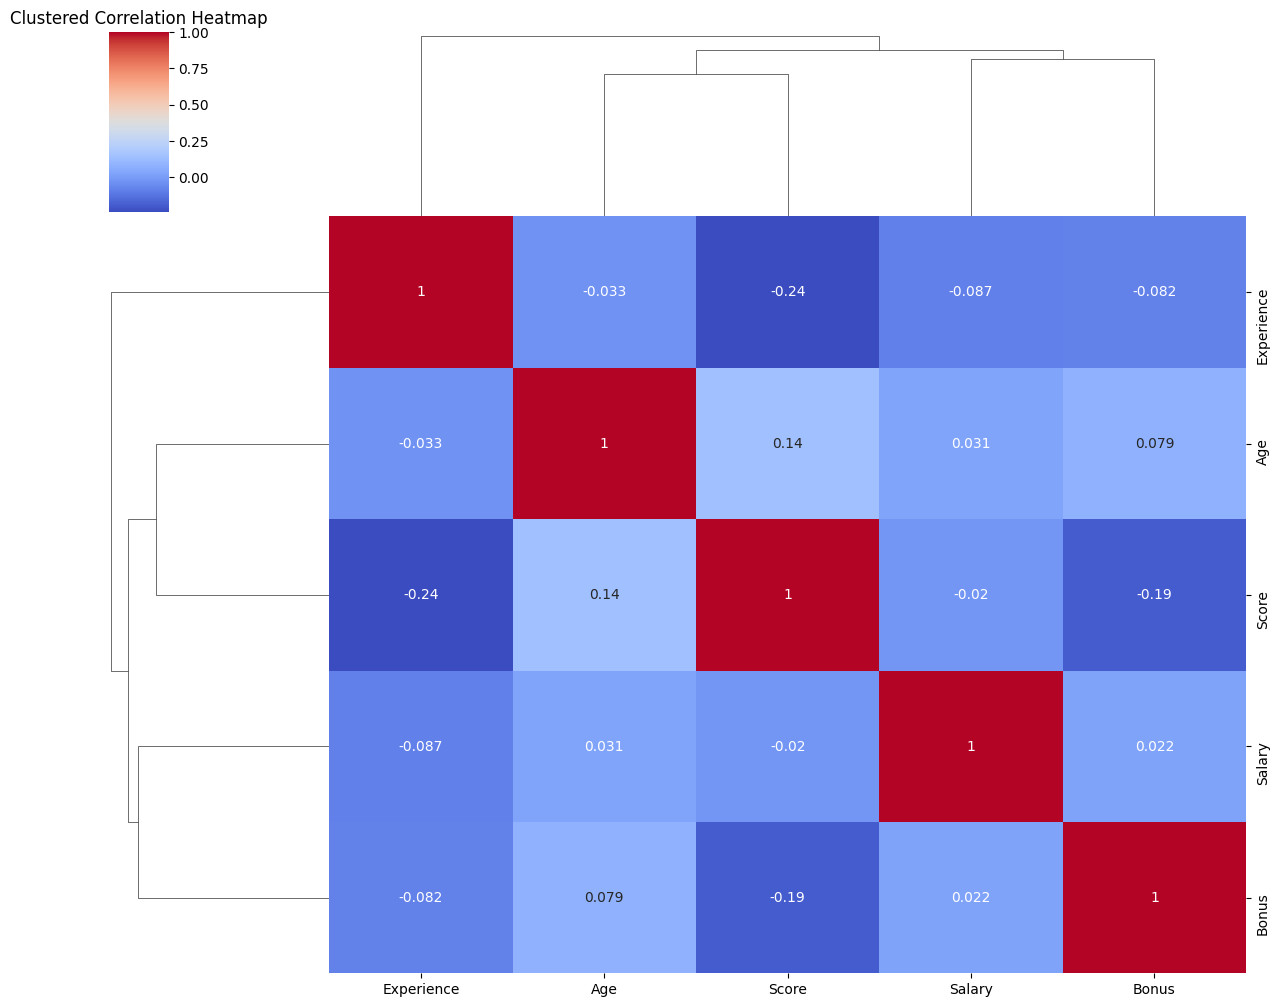

In [18]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate Example Dataset
# Creating a sample dataset with correlations
np.random.seed(42)
data = {
    'Age': np.random.randint(20, 60, 100),
    'Salary': np.random.randint(30000, 120000, 100),
    'Experience': np.random.randint(1, 40, 100),
    'Score': np.random.uniform(0, 100, 100),
    'Bonus': np.random.randint(5000, 20000, 100)
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("Sample Dataset:")
print(df.head())

# 1. Compute Correlation Matrix
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
print(corr_matrix)

# 2. Visualize Correlation Matrix using Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# 3. Filter Strong Correlations
print("\nStrong Correlations (greater than 0.7 or less than -0.7):")
strong_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print(strong_corr)

# 4. Pairwise Visualization (Optional)
# Visualize relationships between features
plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.show()

# 5. Clustered Heatmap (Optional for Larger Datasets)
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, figsize=(12, 10))
plt.title("Clustered Correlation Heatmap")
plt.show()


In [17]:
# Import Required Libraries
import pandas as pd
import numpy as np

# Step 1: Create a Sample Dataset with Missing Values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, np.nan, 35, 29],
    'Salary': [50000, 60000, 55000, np.nan, 52000],
    'Department': ['HR', 'IT', np.nan, 'Finance', 'IT']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the Dataset
print("Original Dataset with Missing Values:")
print(df)

# Step 2: Identify Missing Values
print("\nCount of Missing Values in Each Column:")
print(df.isnull().sum())

# Step 3: Handling Missing Values

# a. Drop Rows with Missing Values
df_dropna = df.dropna()
print("\nDataset after Dropping Rows with Missing Values:")
print(df_dropna)

# b. Fill Missing Values with a Constant
df_fill_constant = df.fillna({'Age': 0, 'Salary': 0, 'Department': 'Unknown'})
print("\nDataset after Filling Missing Values with Constants:")
print(df_fill_constant)

# c. Fill Missing Values with Mean, Median, or Mode
# Fill numerical columns with mean
df_fill_mean = df.copy()
df_fill_mean['Age'] = df_fill_mean['Age'].fillna(df_fill_mean['Age'].mean())
df_fill_mean['Salary'] = df_fill_mean['Salary'].fillna(df_fill_mean['Salary'].mean())

# Fill categorical column with mode
df_fill_mean['Department'] = df_fill_mean['Department'].fillna(df_fill_mean['Department'].mode()[0])

print("\nDataset after Filling Missing Values with Mean/Mode:")
print(df_fill_mean)

# d. Forward Fill (Propagate Previous Values)
df_ffill = df.fillna(method='ffill')
print("\nDataset after Forward Fill:")
print(df_ffill)

# e. Backward Fill (Propagate Next Values)
df_bfill = df.fillna(method='bfill')
print("\nDataset after Backward Fill:")
print(df_bfill)

# f. Interpolation for Numerical Columns
df_interpolate = df.copy()
df_interpolate['Age'] = df_interpolate['Age'].interpolate(method='linear')
df_interpolate['Salary'] = df_interpolate['Salary'].interpolate(method='linear')
print("\nDataset after Interpolation:")
print(df_interpolate)

# g. Using Indicators for Missing Data
df_with_indicator = df.copy()
df_with_indicator['Age_missing'] = df_with_indicator['Age'].isnull().astype(int)
df_with_indicator['Salary_missing'] = df_with_indicator['Salary'].isnull().astype(int)

print("\nDataset with Missing Value Indicators:")
print(df_with_indicator)


Original Dataset with Missing Values:
      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  30.0  60000.0         IT
2  Charlie   NaN  55000.0        NaN
3    David  35.0      NaN    Finance
4      Eve  29.0  52000.0         IT

Count of Missing Values in Each Column:
Name          0
Age           1
Salary        1
Department    1
dtype: int64

Dataset after Dropping Rows with Missing Values:
    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR
1    Bob  30.0  60000.0         IT
4    Eve  29.0  52000.0         IT

Dataset after Filling Missing Values with Constants:
      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  30.0  60000.0         IT
2  Charlie   0.0  55000.0    Unknown
3    David  35.0      0.0    Finance
4      Eve  29.0  52000.0         IT

Dataset after Filling Missing Values with Mean/Mode:
      Name    Age   Salary Department
0    Alice  25.00  50000.0         HR
1      Bob  30.00  60000.0

C:\Users\User\AppData\Local\Temp\ipykernel_2180\2404856710.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_2180\2404856710.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [14]:
# Import Required Libraries
import pandas as pd

# Step 1: Create a Sample Dataset with Duplicate Entries
data = {
    'ID': [1, 2, 3, 4, 5, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40, 29, 35, 40],
    'Salary': [50000, 60000, 55000, 70000, 52000, 55000, 70000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the Original Dataset
print("Original Dataset:")
print(df)

# Step 2: Detect Duplicate Entries
# Find duplicates
duplicates = df[df.duplicated()]
print("\nDuplicate Entries (based on all columns):")
print(duplicates)

# Find duplicates based on a subset of columns (e.g., 'Name' and 'Age')
duplicates_subset = df[df.duplicated(subset=['Name', 'Age'])]
print("\nDuplicate Entries (based on 'Name' and 'Age'):")
print(duplicates_subset)

# Step 3: Remove Duplicate Entries
# Remove duplicates based on all columns (keep first occurrence)
df_no_duplicates = df.drop_duplicates()
print("\nDataset after Removing Duplicate Entries (all columns):")
print(df_no_duplicates)

# Remove duplicates based on specific columns (e.g., 'Name' and 'Age')
df_no_duplicates_subset = df.drop_duplicates(subset=['Name', 'Age'], keep='first')
print("\nDataset after Removing Duplicate Entries (based on 'Name' and 'Age'):")
print(df_no_duplicates_subset)

num_duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows in the Dataset: {num_duplicates}")


Original Dataset:
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   55000
3   4    David   40   70000
4   5      Eve   29   52000
5   3  Charlie   35   55000
6   4    David   40   70000

Duplicate Entries (based on all columns):
   ID     Name  Age  Salary
5   3  Charlie   35   55000
6   4    David   40   70000

Duplicate Entries (based on 'Name' and 'Age'):
   ID     Name  Age  Salary
5   3  Charlie   35   55000
6   4    David   40   70000

Dataset after Removing Duplicate Entries (all columns):
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   55000
3   4    David   40   70000
4   5      Eve   29   52000

Dataset after Removing Duplicate Entries (based on 'Name' and 'Age'):
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   55000
3   4    David   40   70000
4   5      Eve   29   52000

Number of Duplicate Rows in the Da

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Dataset
# Using a sample housing price dataset (replace this with your actual dataset)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Display Dataset Information
print("Dataset Overview:")
print(df.head())
print("\nDataset Summary:")
print(df.info())

# Step 2: Split Data into Features and Target
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target (housing prices)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regression Model
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Step 6: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Perform Grid Search
print("\nStarting Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

# Get Best Parameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Step 7: Train the Optimized Model
optimized_model = RandomForestRegressor(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Evaluate the Optimized Model
y_optimized_pred = optimized_model.predict(X_test)

# Calculate Metrics
optimized_mae = mean_absolute_error(y_test, y_optimized_pred)
optimized_mse = mean_squared_error(y_test, y_optimized_pred)
optimized_rmse = np.sqrt(optimized_mse)
optimized_r2 = r2_score(y_test, y_optimized_pred)

print("\nOptimized Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {optimized_mae:.2f}")
print(f"Mean Squared Error (MSE): {optimized_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {optimized_rmse:.2f}")
print(f"R-Squared (R²): {optimized_r2:.2f}")


Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  2064

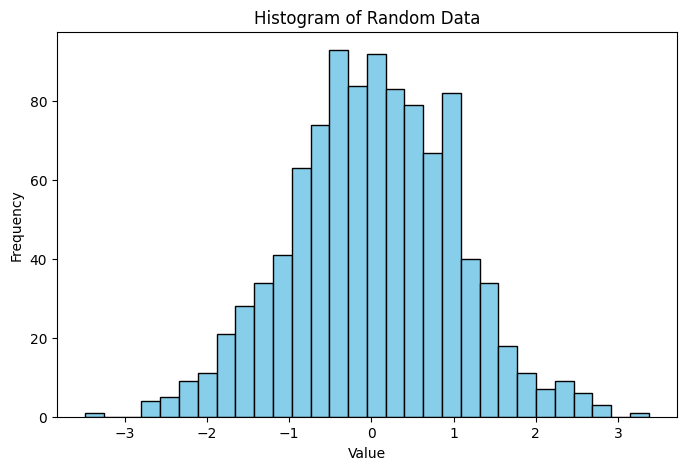

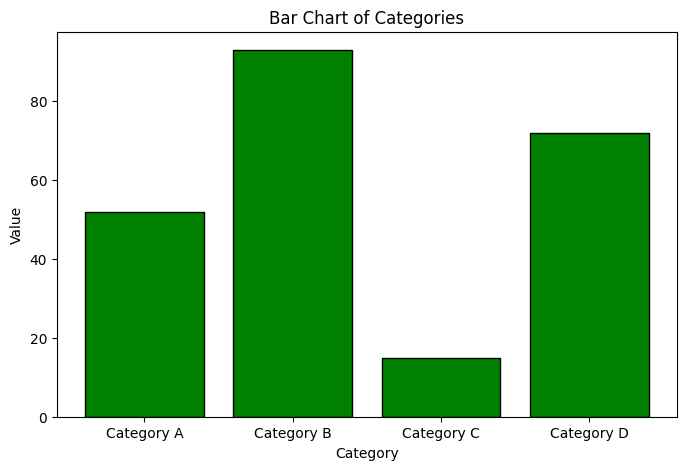

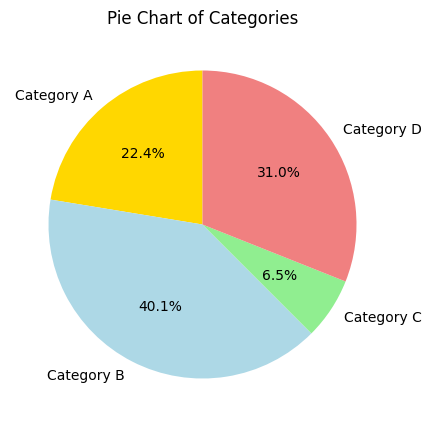

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample Dataset
np.random.seed(42)
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = np.random.randint(1, 100, 4)  # Random values for each category

# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'Category': categories,
    'Value': values
})

# Plot 1: Histogram (for numerical data)
plt.figure(figsize=(8, 5))
plt.hist(np.random.randn(1000), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Bar Chart (for categorical data)
plt.figure(figsize=(8, 5))
plt.bar(data['Category'], data['Value'], color='green', edgecolor='black')
plt.title('Bar Chart of Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# Plot 3: Pie Chart (for categorical data)
plt.figure(figsize=(8, 5))
plt.pie(data['Value'], labels=data['Category'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart of Categories')
plt.show()


Linear Regression:
Mean Squared Error (MSE): 5.88


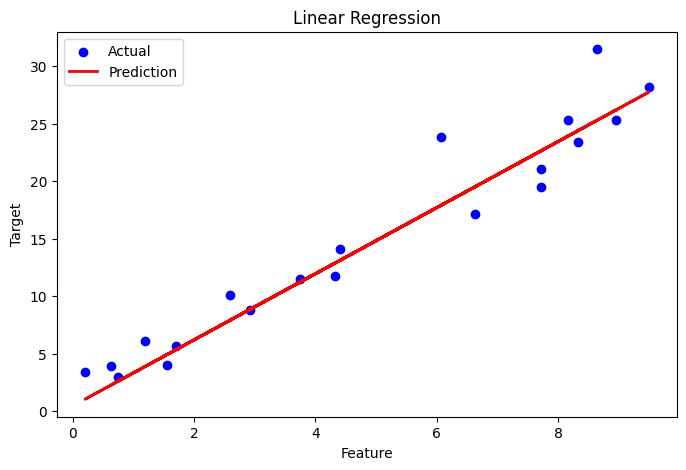


Logistic Regression:
Accuracy: 1.00

Confusion Matrix:
[[19  0]
 [ 0 21]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



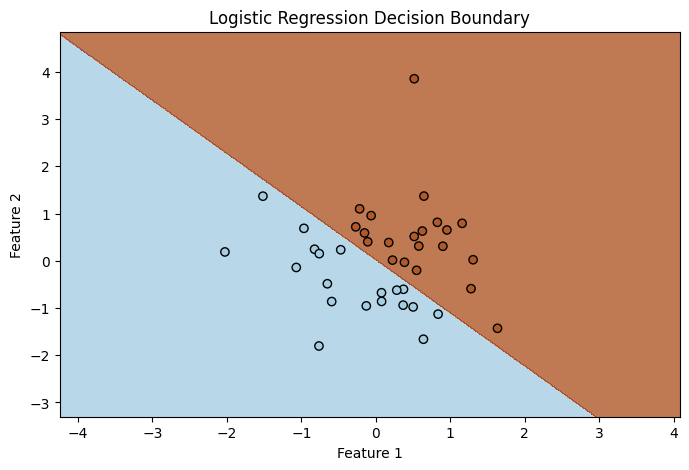

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Linear Regression
print("Linear Regression:")

# Create Sample Dataset for Linear Regression
np.random.seed(42)
X_linear = np.random.rand(100, 1) * 10  # Random numbers as features
y_linear = 3 * X_linear + np.random.randn(100, 1) * 3  # Linear relationship with noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Plot Linear Regression Results
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Step 2: Logistic Regression
print("\nLogistic Regression:")

# Create Sample Dataset for Logistic Regression
X_logistic = np.random.randn(200, 2)  # Two features
y_logistic = (X_logistic[:, 0] + X_logistic[:, 1] > 0).astype(int)  # Binary target based on feature sum

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Logistic Regression Decision Boundary
plt.figure(figsize=(8, 5))
x_min, x_max = X_logistic[:, 0].min() - 1, X_logistic[:, 0].max() + 1
y_min, y_max = X_logistic[:, 1].min() - 1, X_logistic[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Create a sample time-series dataset
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=10, freq='D')
data = pd.DataFrame({
    'Date': date_range,
    'Value': np.random.randn(10) * 10 + 50  # Random values around 50
})
data.set_index('Date', inplace=True)

# Display the original data
print("Original Data:\n", data)

# Create lag features (lags of 1, 2, and 3)
data['Lag_1'] = data['Value'].shift(1)
data['Lag_2'] = data['Value'].shift(2)
data['Lag_3'] = data['Value'].shift(3)

# Display data with lag features
print("\nData with Lag Features:\n", data)


Original Data:
                 Value
Date                 
2020-01-01  54.967142
2020-01-02  48.617357
2020-01-03  56.476885
2020-01-04  65.230299
2020-01-05  47.658466
2020-01-06  47.658630
2020-01-07  65.792128
2020-01-08  57.674347
2020-01-09  45.305256
2020-01-10  55.425600

Data with Lag Features:
                 Value      Lag_1      Lag_2      Lag_3
Date                                                  
2020-01-01  54.967142        NaN        NaN        NaN
2020-01-02  48.617357  54.967142        NaN        NaN
2020-01-03  56.476885  48.617357  54.967142        NaN
2020-01-04  65.230299  56.476885  48.617357  54.967142
2020-01-05  47.658466  65.230299  56.476885  48.617357
2020-01-06  47.658630  47.658466  65.230299  56.476885
2020-01-07  65.792128  47.658630  47.658466  65.230299
2020-01-08  57.674347  65.792128  47.658630  47.658466
2020-01-09  45.305256  57.674347  65.792128  47.658630
2020-01-10  55.425600  45.305256  57.674347  65.792128
